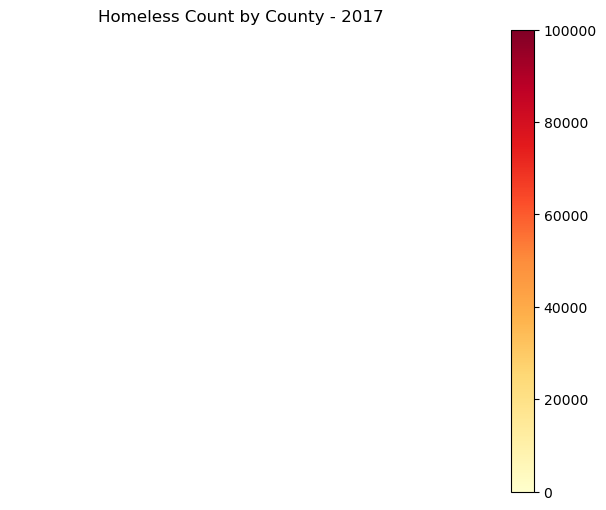

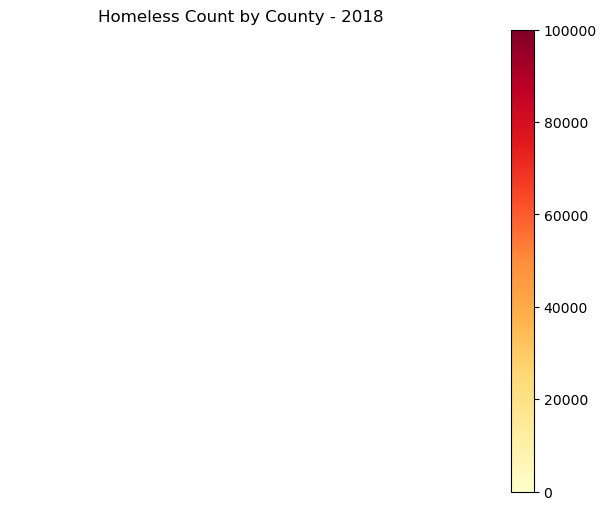

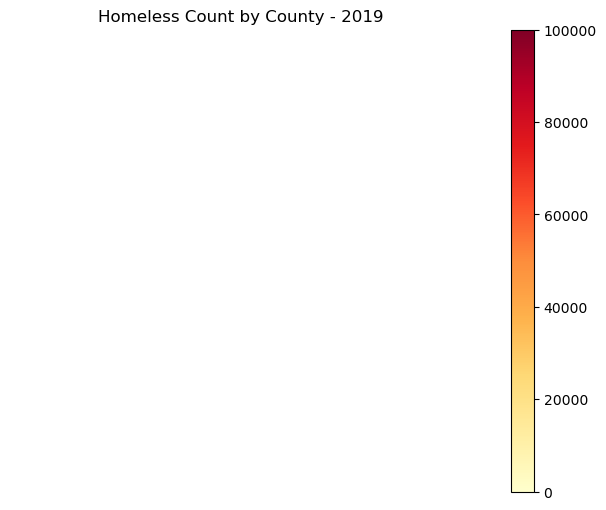

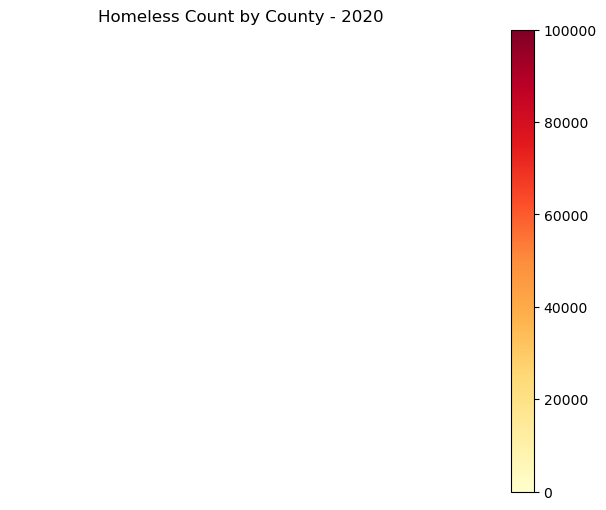

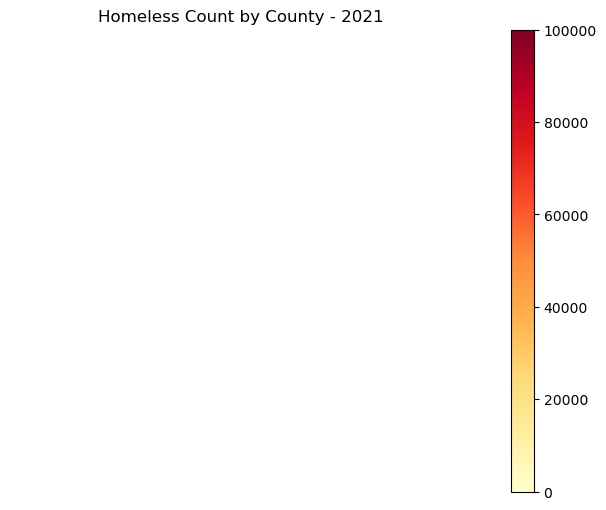

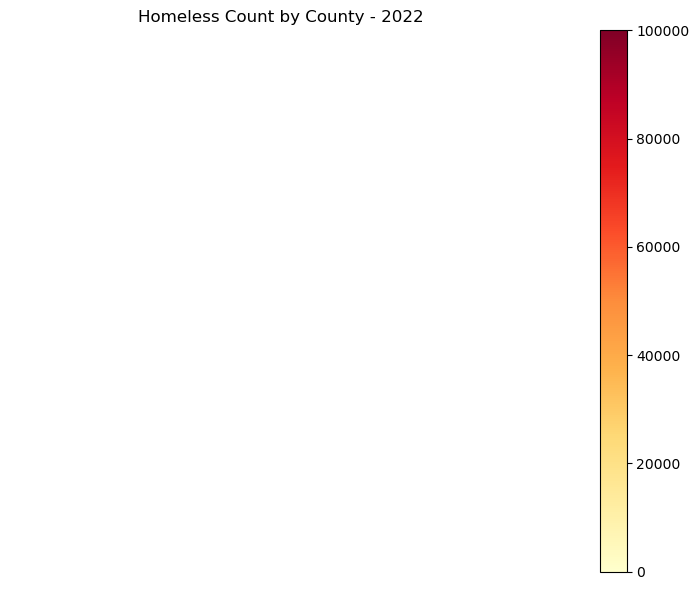

In [13]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)

# Clean and calculate sum of rainfall for each year
weather_df['Year'] = pd.to_datetime(weather_df['Year'], format='%Y')
weather_df['RainfallInInches'] = pd.to_numeric(weather_df['Value'], errors='coerce')
total_rainfall_per_year = weather_df.groupby(weather_df['Year'].dt.year)['RainfallInInches'].sum()

# Capitalize the first letter of all words in "Name" field in weather_df
weather_df['Name'] = weather_df['Name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Convert 'EXPERIENCING_HOMELESSNESS_CNT' column to numeric values
age_df['EXPERIENCING_HOMELESSNESS_CNT'] = pd.to_numeric(age_df['EXPERIENCING_HOMELESSNESS_CNT'], errors='coerce')

# Function to create the choropleth map for a specific year
def create_choropleth_map(year):
    # Filter data for the specific year
    clean_age_df_filtered = age_df[age_df['CALENDAR_YEAR'] == year]

    # Merge homeless counts with California county boundaries data
    california_counties = gpd.read_file('california_counties.geojson')

    # Capitalize the first letter of all words in "name" field in california_counties
    california_counties['name'] = california_counties['name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

    # Merge data with county boundaries
    merged_df = pd.merge(california_counties, clean_age_df_filtered, left_on='name', right_on='COC_NAME', how='left')

    # Plot the choropleth map with fixed range for legend
    fig, ax = plt.subplots(figsize=(10, 6))
    merged_df.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, vmin=0, vmax=100000, ax=ax)
    
    # Set the aspect ratio to 'equal' to ensure the map is not distorted
    ax.set_aspect('equal')
    plt.title(f'Homeless Count by County - {year}')
    plt.axis('off')

# Create choropleth maps for each year
years = [2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    create_choropleth_map(year)

plt.tight_layout()
plt.show()

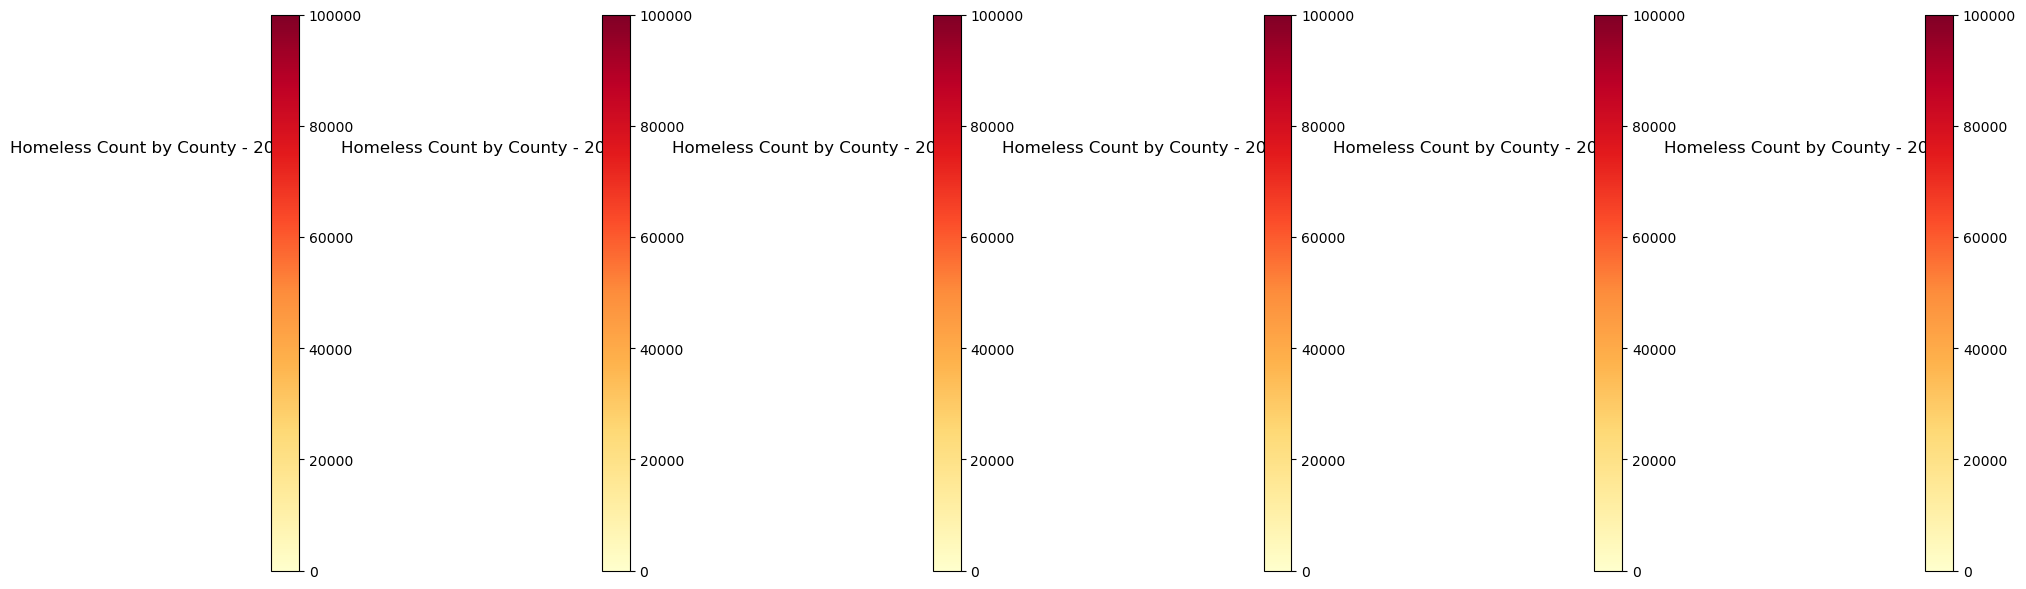

In [7]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)

# Clean and calculate sum of rainfall for each year
weather_df['Year'] = pd.to_datetime(weather_df['Year'], format='%Y')
weather_df['RainfallInInches'] = pd.to_numeric(weather_df['Value'], errors='coerce')
total_rainfall_per_year = weather_df.groupby(weather_df['Year'].dt.year)['RainfallInInches'].sum()

# Capitalize the first letter of all words in "Name" field in weather_df
weather_df['Name'] = weather_df['Name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Convert 'EXPERIENCING_HOMELESSNESS_CNT' column to numeric values
age_df['EXPERIENCING_HOMELESSNESS_CNT'] = pd.to_numeric(age_df['EXPERIENCING_HOMELESSNESS_CNT'], errors='coerce')

# Function to create the choropleth map for a specific year
def create_choropleth_map(year, ax, data_df, data_column):
    # Filter data for the specific year
    clean_age_df_filtered = data_df[data_df['CALENDAR_YEAR'] == year]

    # Merge homeless counts with California county boundaries data
    california_counties = gpd.read_file('california_counties.geojson')

    # Capitalize the first letter of all words in "name" field in california_counties
    california_counties['name'] = california_counties['name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

    # Merge data with county boundaries
    merged_df = pd.merge(california_counties, clean_age_df_filtered, left_on='name', right_on='COC_NAME', how='left')

    # Plot the choropleth map with fixed range for legend
    merged_df.plot(column=data_column, cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, vmin=0, vmax=100000, ax=ax)
    ax.set_title(f'Homeless Count by County - {year}')
    ax.axis('off')

# Create choropleth maps for each year
years = [2017, 2018, 2019, 2020, 2021, 2022]
fig, axs = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)
for i, year in enumerate(years):
    create_choropleth_map(year, axs[i], age_df, 'EXPERIENCING_HOMELESSNESS_CNT')
plt.tight_layout()
plt.show()

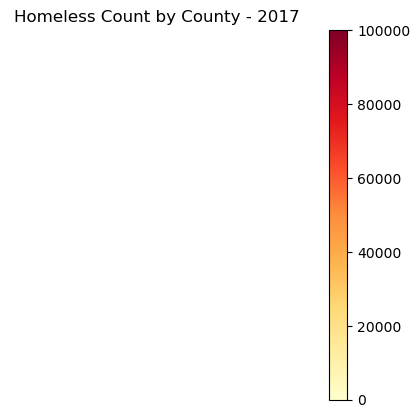

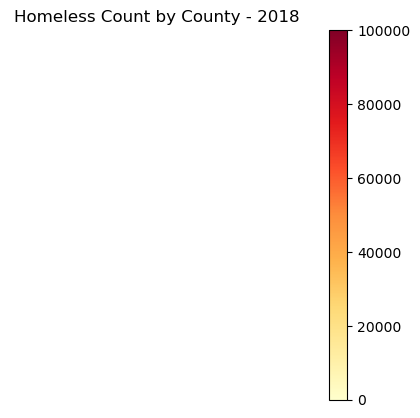

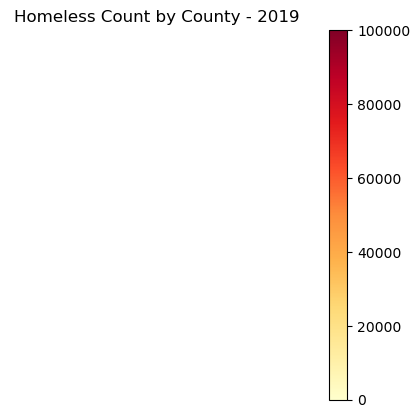

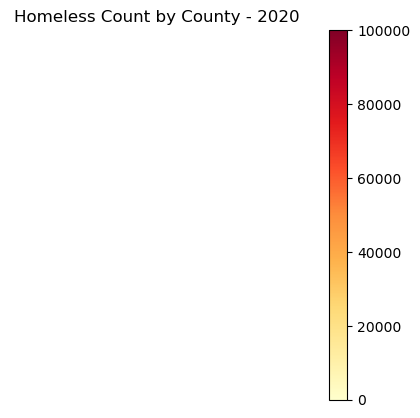

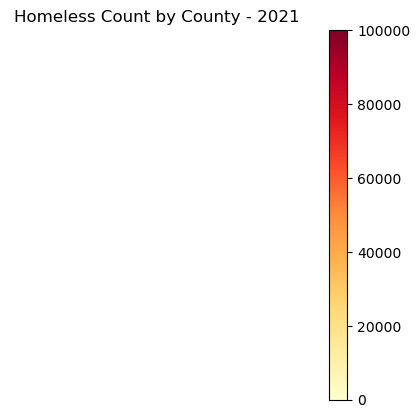

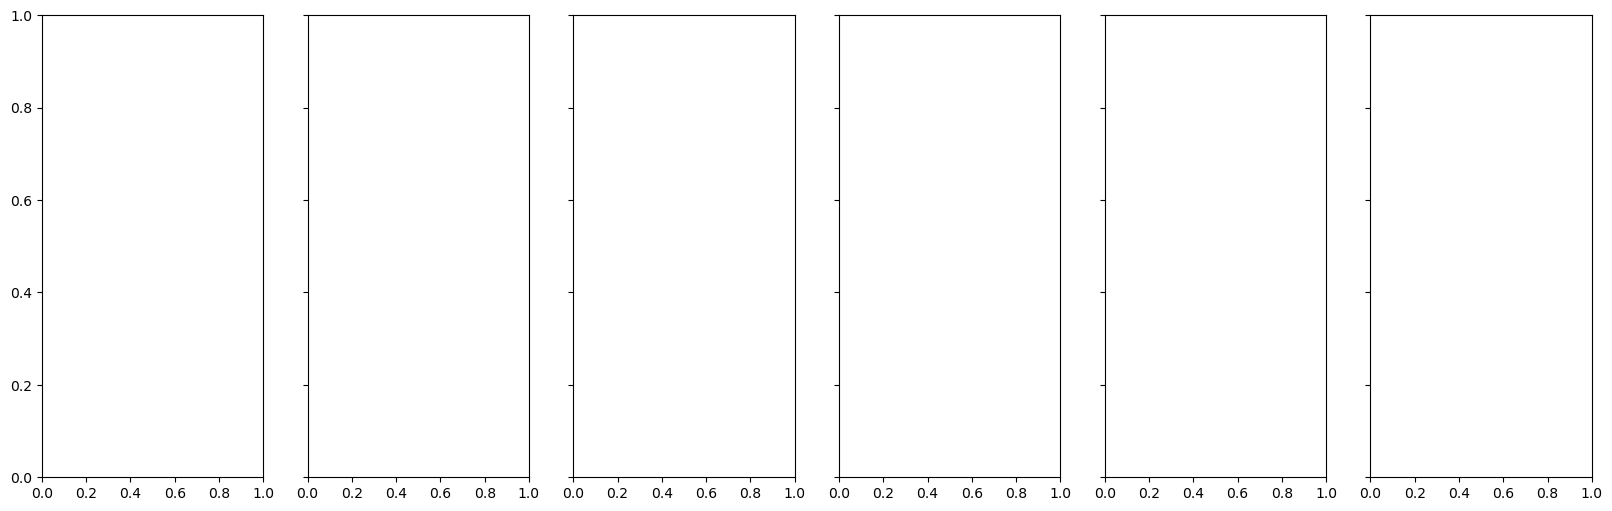

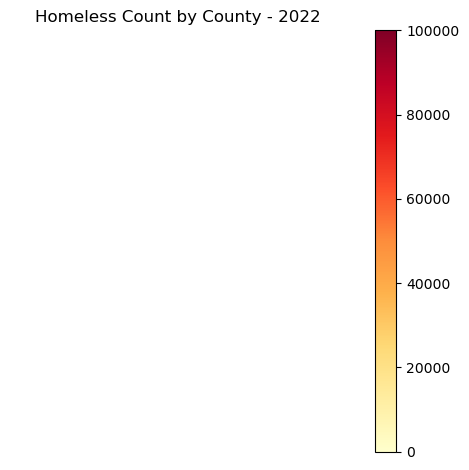

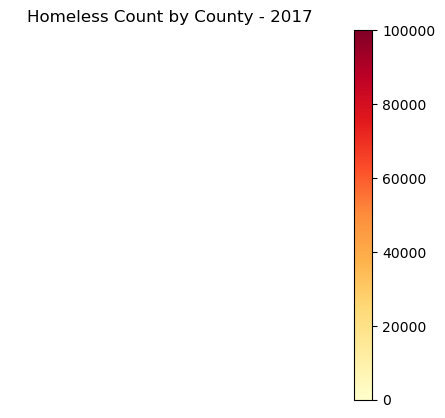

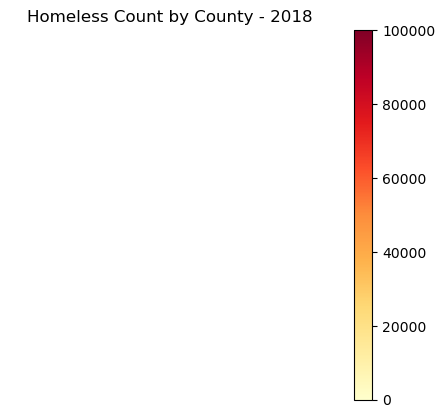

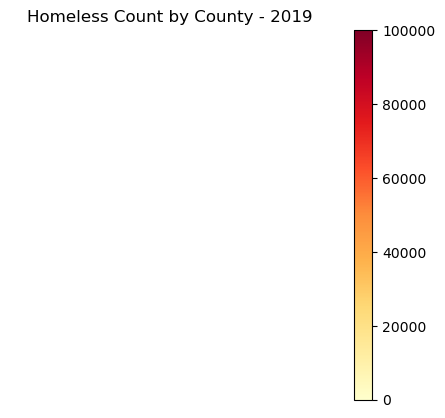

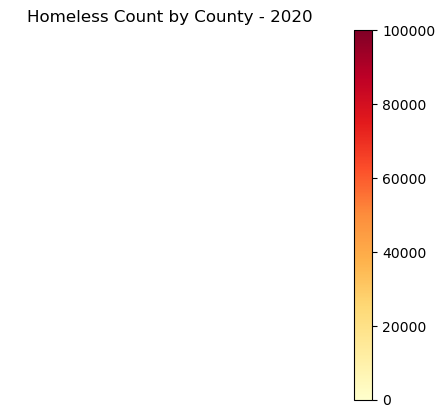

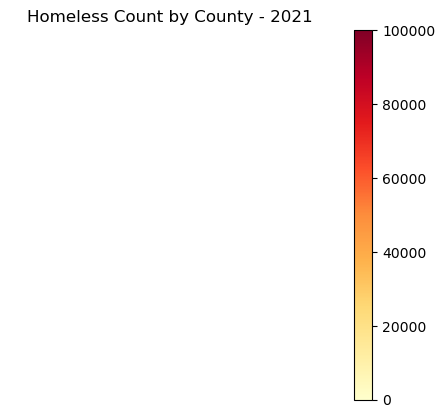

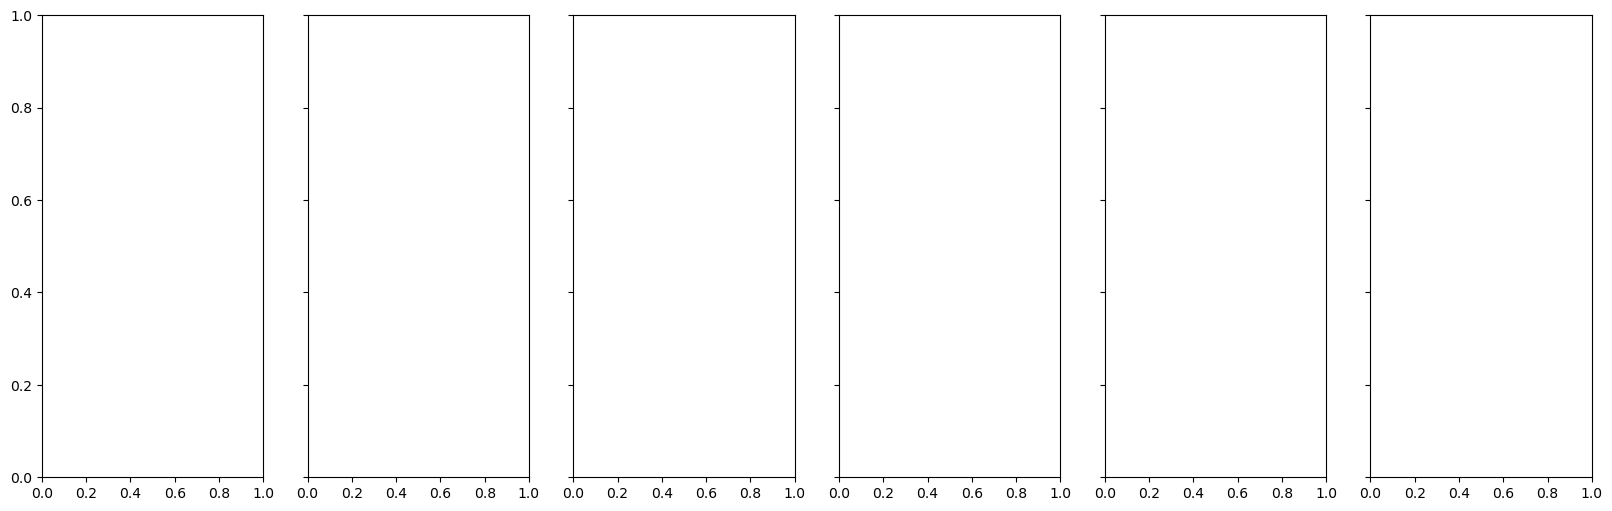

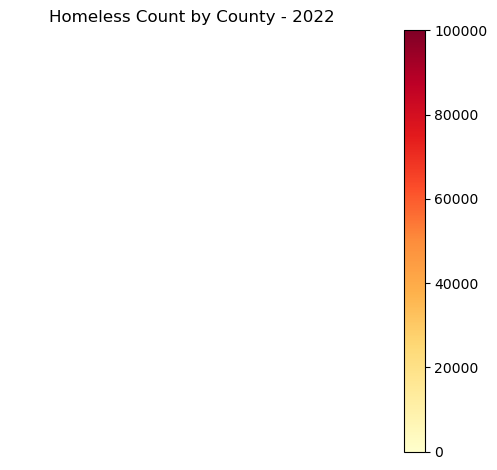

In [12]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)

# Clean and calculate sum of rainfall for each year
weather_df['Year'] = pd.to_datetime(weather_df['Year'], format='%Y')
weather_df['RainfallInInches'] = pd.to_numeric(weather_df['Value'], errors='coerce')
total_rainfall_per_year = weather_df.groupby(weather_df['Year'].dt.year)['RainfallInInches'].sum()

# Capitalize the first letter of all words in "Name" field in weather_df
weather_df['Name'] = weather_df['Name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Convert 'EXPERIENCING_HOMELESSNESS_CNT' column to numeric values
age_df['EXPERIENCING_HOMELESSNESS_CNT'] = pd.to_numeric(age_df['EXPERIENCING_HOMELESSNESS_CNT'], errors='coerce')

# Function to create the choropleth map for a specific year
def create_choropleth_map(year):
    # Filter data for the specific year
    clean_age_df_filtered = age_df[age_df['CALENDAR_YEAR'] == year]

    # Merge homeless counts with California county boundaries data
    california_counties = gpd.read_file('california_counties.geojson')

    # Capitalize the first letter of all words in "name" field in california_counties
    california_counties['name'] = california_counties['name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

    # Merge data with county boundaries
    merged_df = pd.merge(california_counties, clean_age_df_filtered, left_on='name', right_on='COC_NAME', how='left')

    # Get the bounding box of the merged GeoDataFrame
    bbox = merged_df.total_bounds
    # Add some padding to the bounding box
    bbox_padding = 0.1
    x0, y0, x1, y1 = bbox
    x_padding = (x1 - x0) * bbox_padding
    y_padding = (y1 - y0) * bbox_padding
    bbox_padded = (x0 - x_padding, y0 - y_padding, x1 + x_padding, y1 + y_padding)

    # Plot the choropleth map with fixed range for legend
    ax = merged_df.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, vmin=0, vmax=100000)
    ax.set_xlim(bbox_padded[0], bbox_padded[2])
    ax.set_ylim(bbox_padded[1], bbox_padded[3])
    plt.title(f'Homeless Count by County - {year}')
    plt.axis('off')

# Create choropleth maps for each year
years = [2017, 2018, 2019, 2020, 2021, 2022]
fig, axs = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)
for i, year in enumerate(years):
    plt.sca(axs[i])
    create_choropleth_map(year)
plt.tight_layout()
plt.show()

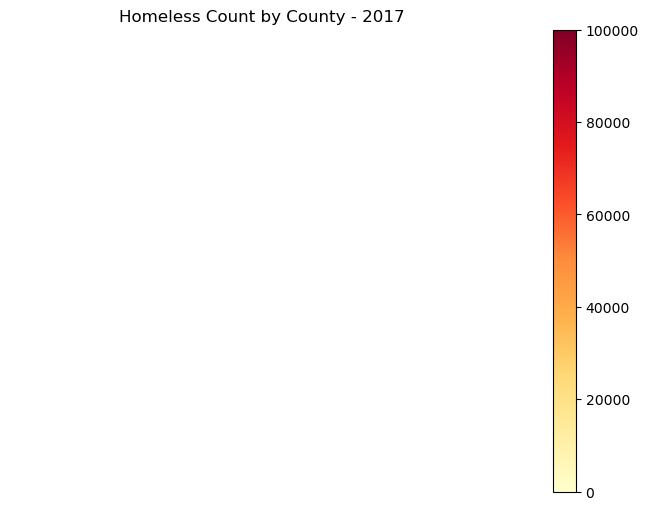

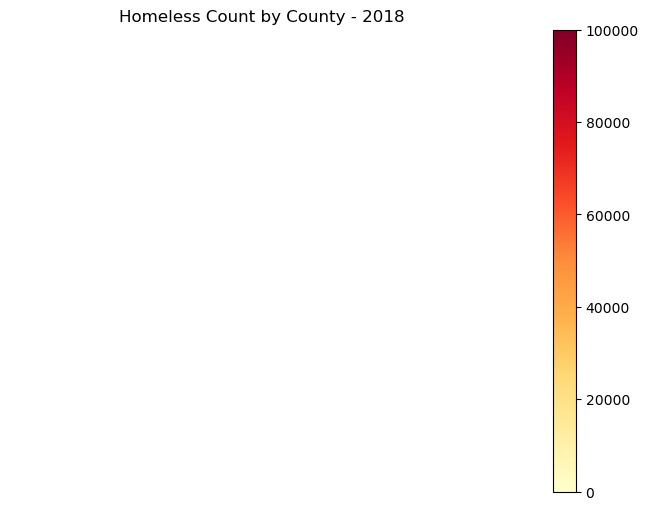

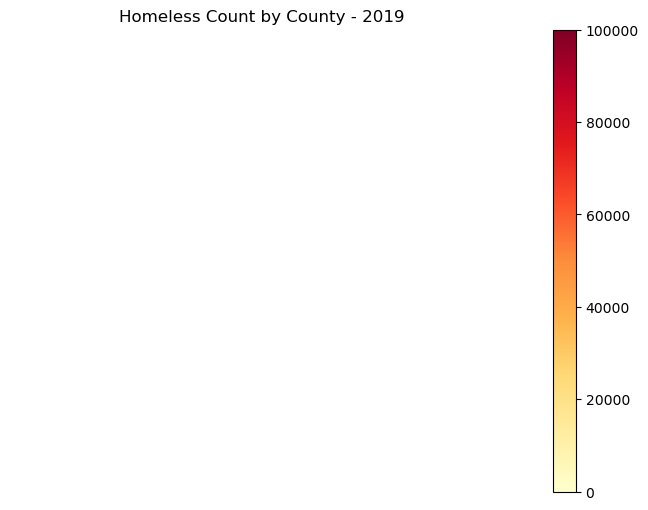

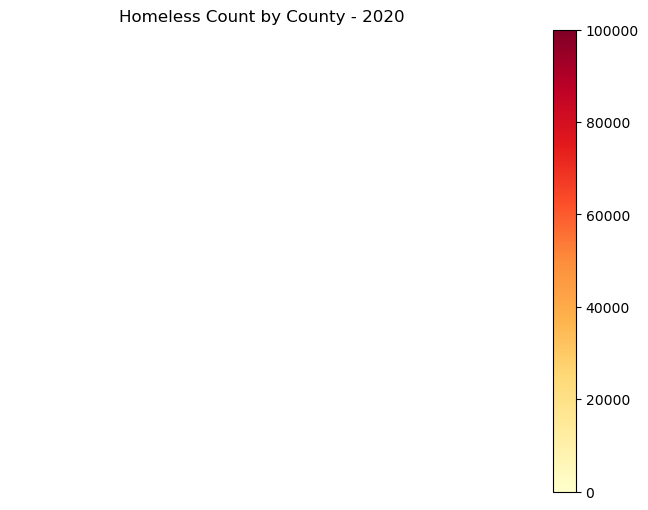

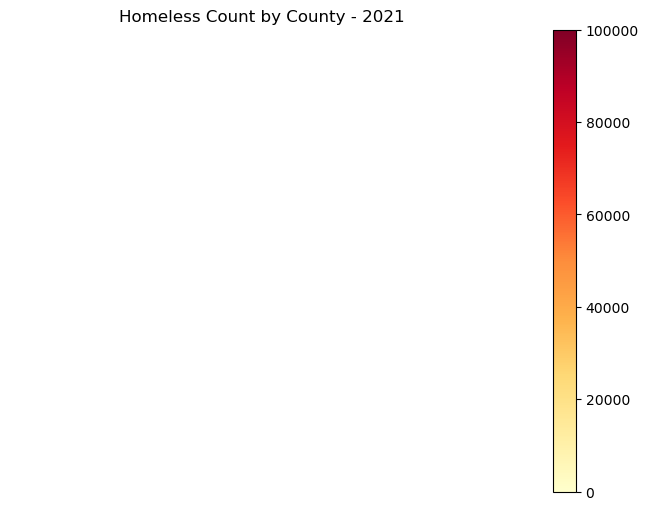

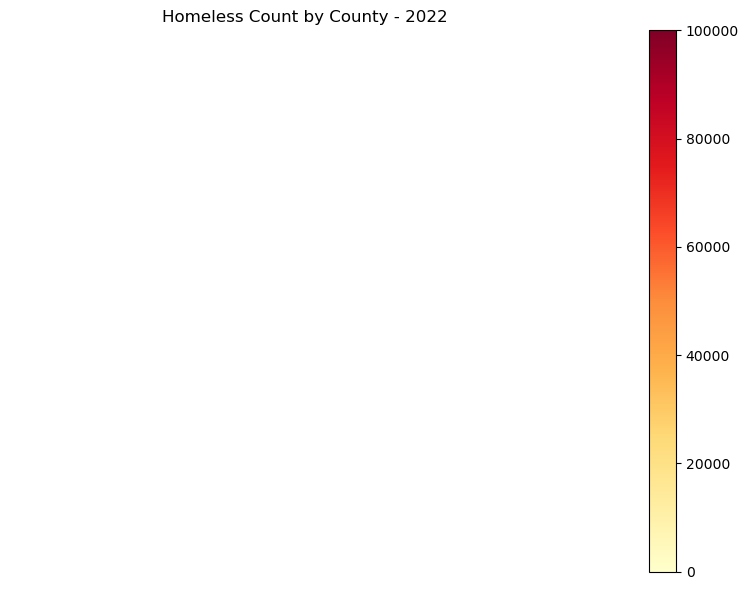

In [14]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)

# Clean and calculate sum of rainfall for each year
weather_df['Year'] = pd.to_datetime(weather_df['Year'], format='%Y')
weather_df['RainfallInInches'] = pd.to_numeric(weather_df['Value'], errors='coerce')
total_rainfall_per_year = weather_df.groupby(weather_df['Year'].dt.year)['RainfallInInches'].sum()

# Capitalize the first letter of all words in "Name" field in weather_df
weather_df['Name'] = weather_df['Name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Convert 'EXPERIENCING_HOMELESSNESS_CNT' column to numeric values
age_df['EXPERIENCING_HOMELESSNESS_CNT'] = pd.to_numeric(age_df['EXPERIENCING_HOMELESSNESS_CNT'], errors='coerce')

# Function to create the choropleth map for a specific year
def create_choropleth_map(year):
    # Filter data for the specific year
    clean_age_df_filtered = age_df[age_df['CALENDAR_YEAR'] == year]

    # Merge homeless counts with California county boundaries data
    california_counties = gpd.read_file('california_counties.geojson')

    # Capitalize the first letter of all words in "name" field in california_counties
    california_counties['name'] = california_counties['name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

    # Merge data with county boundaries
    merged_df = pd.merge(california_counties, clean_age_df_filtered, left_on='name', right_on='COC_NAME', how='left')

    # Plot the choropleth map with fixed range for legend
    fig, ax = plt.subplots(figsize=(10, 6))
    merged_df.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, vmin=0, vmax=100000, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the map is not distorted
    ax.set_aspect('equal')

    # Set the extent of the map using the bounding box of California county boundaries
    ax.set_xlim(-125, -113)
    ax.set_ylim(32, 43)

    plt.title(f'Homeless Count by County - {year}')
    plt.axis('off')

# Create choropleth maps for each year
years = [2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    create_choropleth_map(year)

plt.tight_layout()
plt.show()

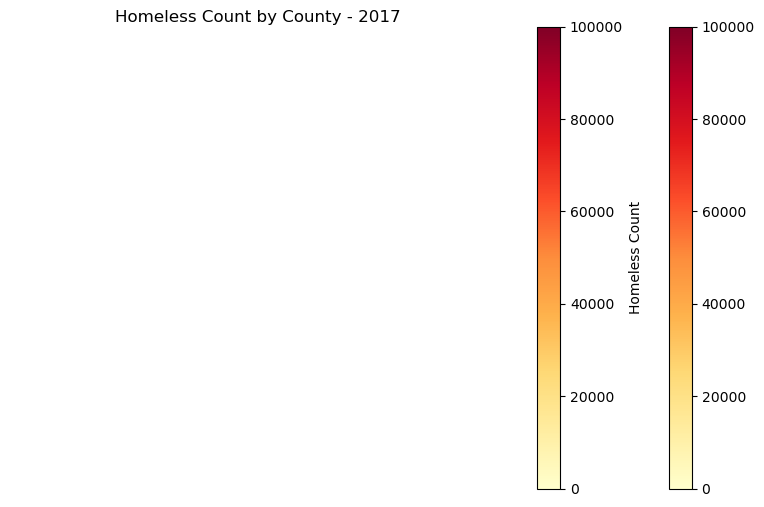

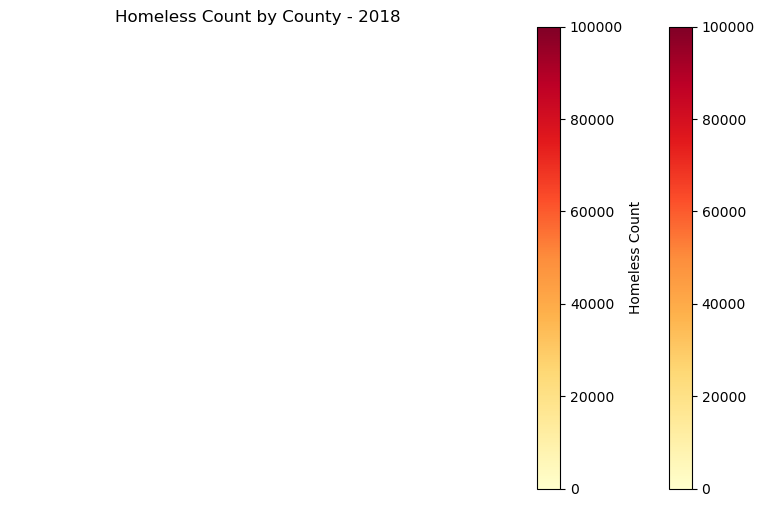

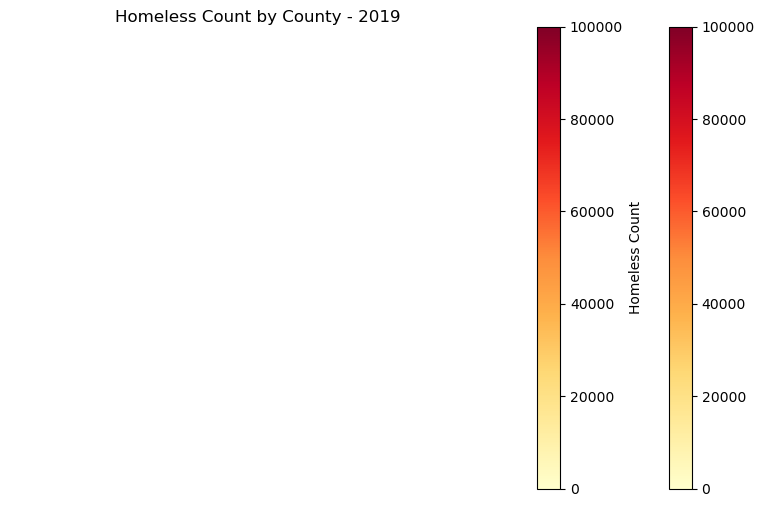

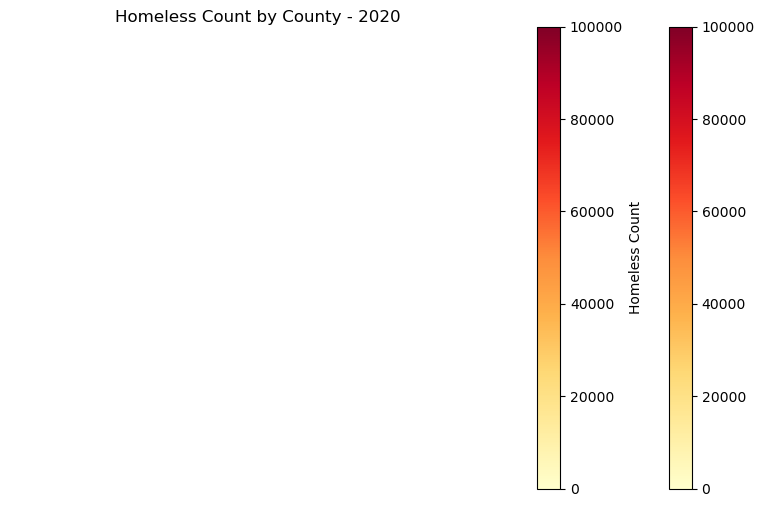

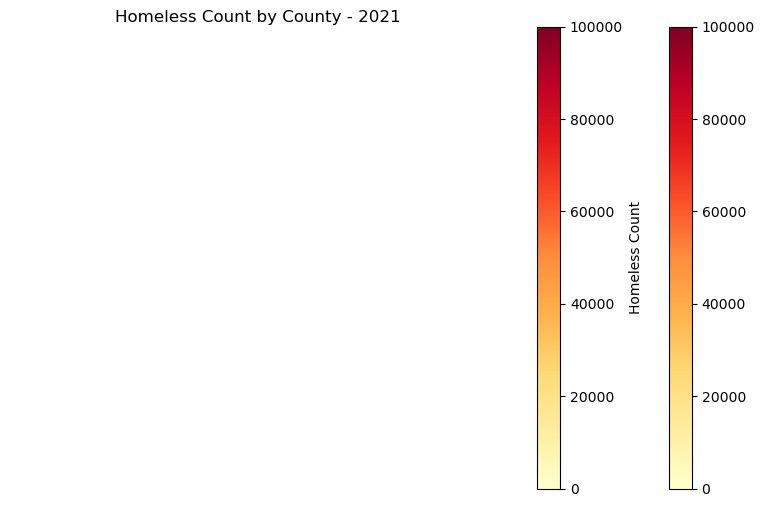

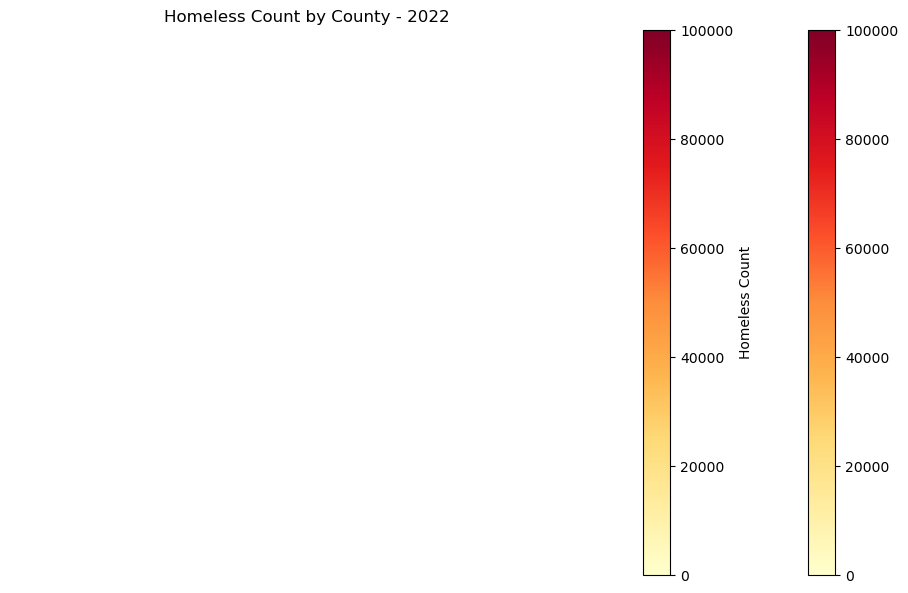

In [18]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)

# Clean and calculate sum of rainfall for each year
weather_df['Year'] = pd.to_datetime(weather_df['Year'], format='%Y')
weather_df['RainfallInInches'] = pd.to_numeric(weather_df['Value'], errors='coerce')
total_rainfall_per_year = weather_df.groupby(weather_df['Year'].dt.year)['RainfallInInches'].sum()

# Capitalize the first letter of all words in "Name" field in weather_df
weather_df['Name'] = weather_df['Name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Convert 'EXPERIENCING_HOMELESSNESS_CNT' column to numeric values
age_df['EXPERIENCING_HOMELESSNESS_CNT'] = pd.to_numeric(age_df['EXPERIENCING_HOMELESSNESS_CNT'], errors='coerce')

# Function to create the choropleth map for a specific year
def create_choropleth_map(year):
    # Filter data for the specific year
    clean_age_df_filtered = age_df[age_df['CALENDAR_YEAR'] == year]

    # Merge homeless counts with California county boundaries data
    california_counties = gpd.read_file('california_counties.geojson')

    # Capitalize the first letter of all words in "name" field in california_counties
    california_counties['name'] = california_counties['name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

    # Merge data with county boundaries
    merged_df = pd.merge(california_counties, clean_age_df_filtered, left_on='name', right_on='COC_NAME', how='left')

    # Plot the choropleth map with fixed range for legend
    fig, ax = plt.subplots(figsize=(10, 6))
    merged_df.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, vmin=0, vmax=100000, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the map is not distorted
    ax.set_aspect('equal')

    # Set the extent of the map using the bounding box of California county boundaries
    ax.set_xlim(-125, -113)
    ax.set_ylim(32, 43)

    plt.title(f'Homeless Count by County - {year}')
    plt.axis('off')

    # Create a mappable object for colorbar
    im = plt.imshow([[0, 0], [0, 0]], cmap='YlOrRd', vmin=0, vmax=100000)
    plt.colorbar(im, ax=ax, label='Homeless Count')

# Create choropleth maps for each year
years = [2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    create_choropleth_map(year)

plt.tight_layout()
plt.show()

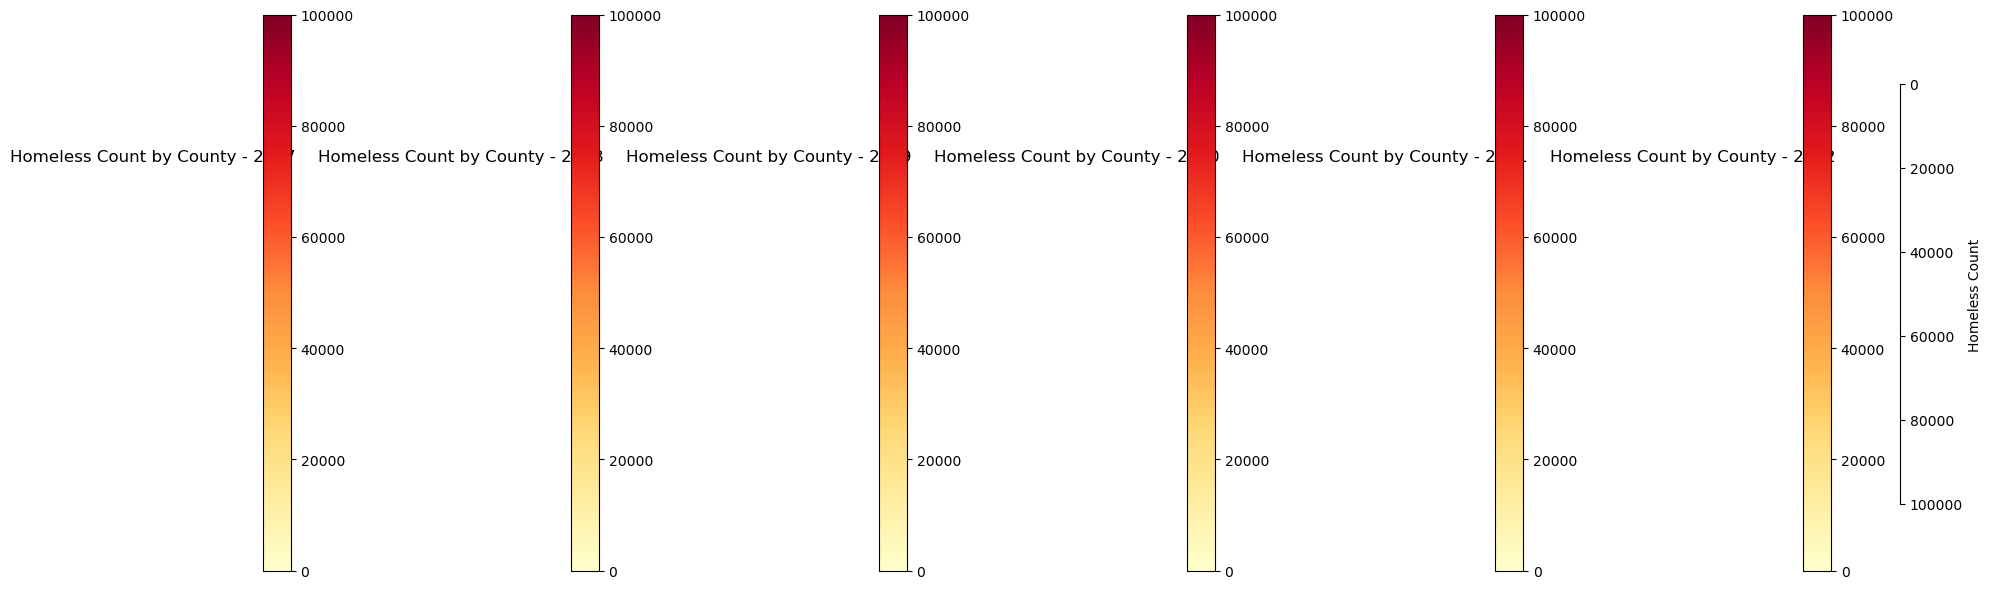

In [16]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)

# Clean and calculate sum of rainfall for each year
weather_df['Year'] = pd.to_datetime(weather_df['Year'], format='%Y')
weather_df['RainfallInInches'] = pd.to_numeric(weather_df['Value'], errors='coerce')
total_rainfall_per_year = weather_df.groupby(weather_df['Year'].dt.year)['RainfallInInches'].sum()

# Capitalize the first letter of all words in "Name" field in weather_df
weather_df['Name'] = weather_df['Name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Convert 'EXPERIENCING_HOMELESSNESS_CNT' column to numeric values
age_df['EXPERIENCING_HOMELESSNESS_CNT'] = pd.to_numeric(age_df['EXPERIENCING_HOMELESSNESS_CNT'], errors='coerce')

# Function to create the choropleth map for a specific year
def create_choropleth_map(year, ax):
    # Filter data for the specific year
    clean_age_df_filtered = age_df[age_df['CALENDAR_YEAR'] == year]

    # Merge homeless counts with California county boundaries data
    california_counties = gpd.read_file('california_counties.geojson')

    # Capitalize the first letter of all words in "name" field in california_counties
    california_counties['name'] = california_counties['name'].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))

    # Merge data with county boundaries
    merged_df = pd.merge(california_counties, clean_age_df_filtered, left_on='name', right_on='COC_NAME', how='left')

    # Plot the choropleth map with fixed range for legend
    merged_df.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, vmin=0, vmax=100000, ax=ax)

    ax.set_title(f'Homeless Count by County - {year}')
    ax.set_axis_off()

# Create choropleth maps for each year
years = [2017, 2018, 2019, 2020, 2021, 2022]
fig, axs = plt.subplots(1, len(years), figsize=(20, 6), sharey=True)
for i, year in enumerate(years):
    create_choropleth_map(year, axs[i])

# Position the legend outside the plot area
plt.tight_layout()
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Create a mappable object for colorbar using imshow
im = plt.imshow([[0, 0], [0, 0]], cmap='YlOrRd', vmin=0, vmax=100000)
plt.colorbar(im, cax=cbar_ax, label='Homeless Count')

plt.show()